In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("ggplot")

In [120]:
data = pd.read_csv("xclara.csv")
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [121]:
x = data["V1"].values
y = data["V2"].values
arr = np.array(list(zip(x,y)))

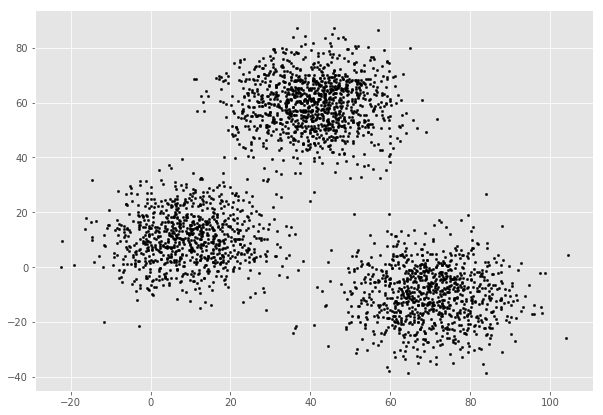

In [122]:
plt.figure(figsize=(10,7))
plt.scatter(x,y,s=5,c="black")

In [123]:
def dist(x,y,ax=1):
    return np.linalg.norm(x-y,axis=ax)

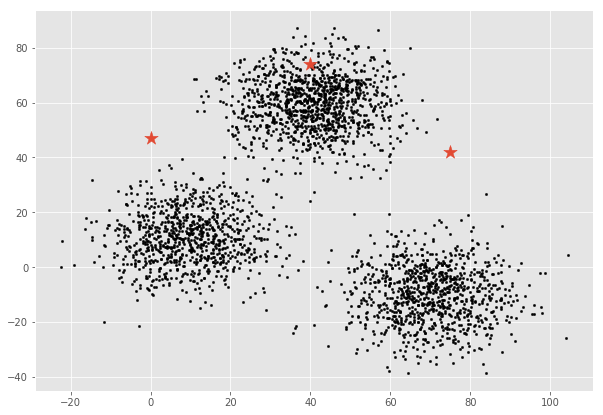

In [124]:
k = 3

centroids_x = np.random.randint(0, max(x)-20, size = k)
centroids_y = np.random.randint(0, max(x)-20, size = k)
centroids = np.array(list(zip(centroids_x,centroids_y)))

plt.figure(figsize=(10,7))
plt.scatter(x, y, s = 5, c = "black")
plt.scatter(centroids_x, centroids_y, s = 200, marker = "*")

In [125]:
c_old = np.zeros(centroids.shape)

clusters = np.zeros(len(arr))

error = dist(centroids, c_old, None)

while error != 0:
    
    for i in range(len(arr)):
        distances = dist(arr[i], centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    c_old = deepcopy(centroids)
    
    for i in range(k):
        points = [arr[j] for j in range(len(arr)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis = 0)
        
    error = dist(centroids, c_old, None)

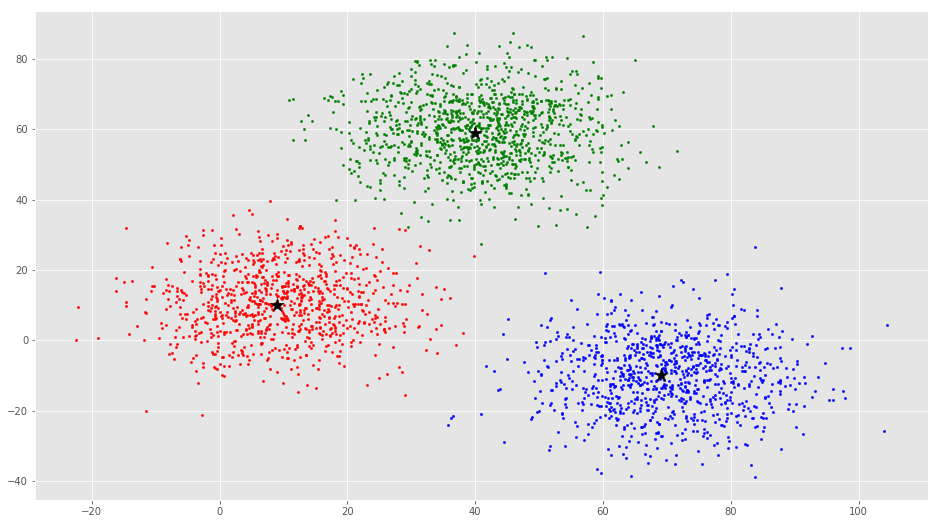

In [127]:
colors = ["r","g","b"]

fig,sub = plt.subplots()

for i in range(k):
    points = np.array([arr[j] for j in range(len(arr)) if clusters[j] == i])
    sub.scatter(points[:, 0],points[:, 1],s=5,c=colors[i])
    
sub.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
